## Imports

In [1]:
# utils
import os
import sys
from pathlib import Path
PROJECT_DIR = Path.cwd().parent
sys.path.append(str(PROJECT_DIR))

# basics
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.decomposition import PCA
# viz
import matplotlib.pyplot as plt
import seaborn as sns

# metrics
from utils import config
from utils.reader import read_file_yaml
from utils.plot.plot import GeneratePlots
from utils.utils import set_params

np.random.seed(0)

## Reading datasets

In [2]:
path_outputs_url = (
    PROJECT_DIR
    / "outputs"
)
path_results_url = (
    PROJECT_DIR
    / "results"
)
path_data_url = (
    PROJECT_DIR
    / "data"
)
file_path_parameters = (
    PROJECT_DIR
    / "conf" 
    / "parameters.yml"
)
params = read_file_yaml(file_path_parameters)

n_random = np.sort([int(i.replace("random_n",""))for i in os.listdir(path_results_url) if ".placehold"not in i])
path_random = [
    "random_n"+str(i) for i in n_random
]
path_results = [path_outputs_url / i for i in path_random]

ext_type = params["outputs"]["extension_type"]
ext_local_img = params["outputs"]["extension_local_img"]
ext_best_img = params["outputs"]["extension_best_img"]

In [3]:
path_data = {
    i: path_data_url / i for i in config.file_names
}
path_params = {
    i: {
        j: path_results_url / i / j / "params" for j in config.file_names
    } for i in path_random
}

In [4]:
data = {
    i_name: pd.read_csv( 
        i_url 
        / Path(i_name + f"{ext_type}")
    ) if f"{i_name}_pca{ext_type}" not in os.listdir(i_url) else pd.read_csv( 
        i_url 
        / Path(i_name + "_pca" + ext_type)
    ) for i_name, i_url in path_data.items()
}

In [5]:
params = {}
for i_random, i_content in path_params.items():
    params[i_random] = {}
    for j_name, j_content in i_content.items():
        params[i_random][j_name] = {}
        for which in ["abilities", "diff_disc"]:
            try:
                params[i_random][j_name][which] = pd.read_csv(j_content / Path(which+ext_type), index_col = 0)
            except:
                continue

## Plot of difficulties

In [9]:
len(config.file_names)

10

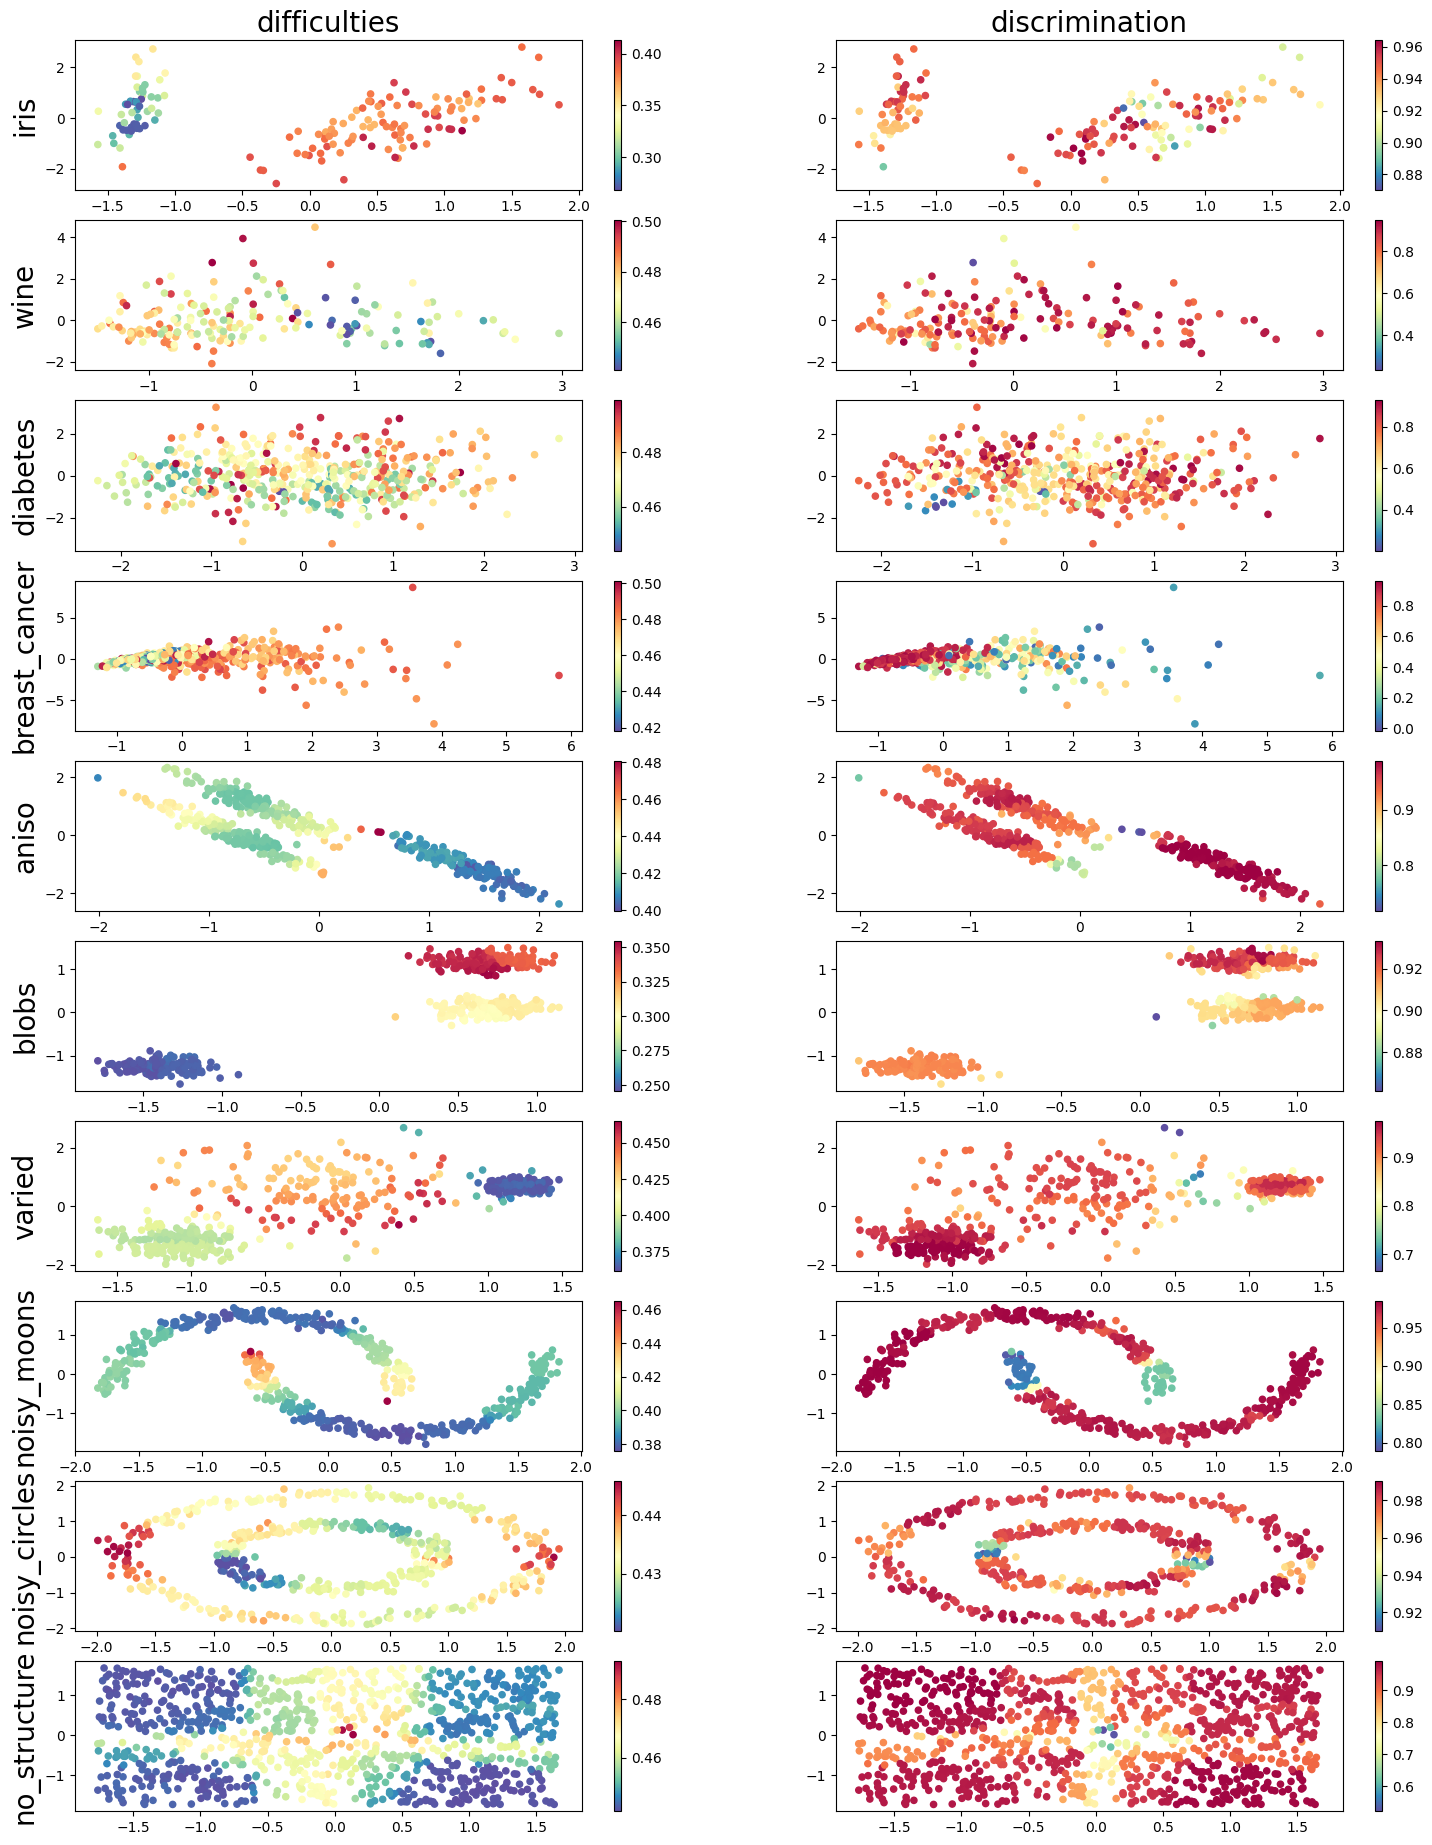

In [11]:
figs = {}
for i_random, i_content in list(params.items())[:1]:
    _plt_parameters = set_params(data, i_content)
    gp = GeneratePlots(data = data)
    fig, _ = gp.scatterplot_diff_disc(
        len(_plt_parameters.keys()), 
        2, 
        plot_parameters = _plt_parameters,
        figsize = (18, 23)#14 --- x) 
    )                  #23 --- y    23x = 14
    figs[i_random] = fig
    figs[i_random].savefig(
        path_outputs_url 
        / Path(i_random + "_" + "diff_disc_all" + ext_best_img),
        format=ext_best_img[1:]) # eps format
    figs[i_random].savefig(
        path_outputs_url 
        / Path(i_random + "_" + "diff_disc_all" + ext_local_img),
        format=ext_local_img[1:]) # png format